# Atelier JEIA - Chiffrement d'images

Pauline PUTEAUX, 08/02/2023

In [2]:
# Packages
import matplotlib.pyplot as plt
from PIL import Image
from math import *
import random

Les échanges d'images représentent aujourd'hui une part importante de l'utilisation d'Internet. Cette tendance va de pair avec des exigences de confidentialité puisque la transmission peut être espionnée sur les canaux publics. Dans ce contexte, il a été proposé de chiffrer les images afin de dissimuler leur contenu et de les rendre visuellement confidentielles pour les utilisateurs non-autorisés. Certaines méthodes de chiffrement ont été spécifiquement conçues pour les images afin de préserver leur format et leur taille et de permettre leur visualisation après chiffrement. 

Dans cet atelier, nous avons pour objectif d'étudier différentes méthodes de chiffrement d'images. Nous nous intéresserons également à leur sécurité en effectuant des mesures statistiques et en essayant des scénarios d'attaque.

### 1 - Chargement d'une image et analyse

a) Ouvrir une image en niveaux de gris et l'afficher.

In [62]:
def ouvrirImageGris(cheminImage):
    image = Image.open(cheminImage).convert('L')
    return image

def afficherImage(image):
    image.show()

cheminImage = "koulkoul.png" # à compléter avec votre image
image = ouvrirImageGris(cheminImage)
afficherImage(image)

b) Afficher les dimensions de l'image.

In [63]:
tailleImage = image.size
print("Les dimensions de l'image sont : ", tailleImage)

Les dimensions de l'image sont :  (2454, 2250)


c) Ecrire une fonction pour afficher l'histogramme d'une image.

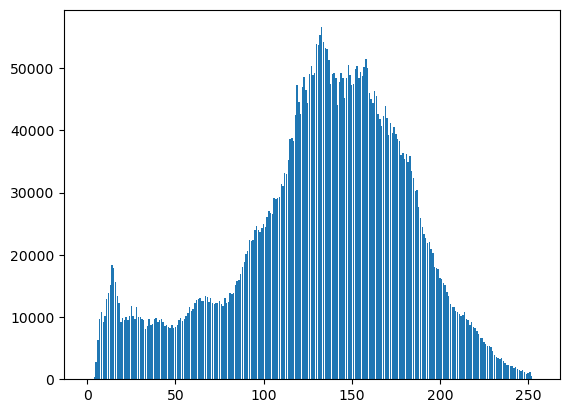

In [64]:
def calculHistogramme(image):
    return image.histogram()

def afficherHistogramme(histogrammeImage):
    plt.bar(range(len(histogrammeImage)), histogrammeImage)

histogrammeImage = calculHistogramme(image)
afficherHistogramme(histogrammeImage)

d) Ecrire une fonction pour calculer l'entropie d'une image. 

In [66]:
def entropieImage(histogrammeImage):
    nbPixels = sum(histogrammeImage)
    entropie = 0
    for val in histogrammeImage:
        if val != 0:
            entropie += (val/nbPixels) * log2(val/nbPixels)
    return (-1) * entropie


entropie = entropieImage(histogrammeImage)
print("L'entropie de l'image est de : ", entropie, "bits par pixel (bpp).")

L'entropie de l'image est de :  7.563607214694457 bits par pixel (bpp).


e) Ecrire une fonction pour calculer le PSNR entre deux images.

In [67]:
def erreurQuadratiqueMoyenne(image1, image2):
    somme = 0
    for i in range(image1.size[0]):
        for j in range(image1.size[1]):
            difference = image1.getpixel((i,j)) - image2.getpixel((i,j))
            carreDifference = difference ** 2
            somme += carreDifference
    return somme / (image1.size[0] * image1.size[1])

def psnr(image1, image2):
    erreur = erreurQuadratiqueMoyenne(image1, image2)
    if erreur == 0:
        return "inf"
    return 10 * log10((255 ** 2) / erreur)

#### Fonctions auxiliaires utiles pour la suite

In [68]:
def image2Dto1D(image):
    listePixels = []
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            listePixels.append(image.getpixel((i,j)))
    return listePixels

def image1Dto2D(listePixels, tailleImage):
    image = Image.new('L', tailleImage)
    k = 0
    for i in range(tailleImage[0]):
        for j in range(tailleImage[1]):
            image.putpixel((i,j), listePixels[k])
            k += 1
    return image

### 2 - Chiffrement par permutation

a) Ecrire une fonction qui prend en entrée un nombre $n$ et une clé $k$, crée une liste $[0,n-1]$ et retourne la liste mélangée en utilisant $k$ en tant que graine d'initialisation.

In [69]:
def melangeIndices(n, k):
    indices = list(range(n))
    random.seed(k)
    random.shuffle(indices)
    return indices

n = 4 # tester plusieurs paramètres
k = 3 # tester plusieurs paramètres
indicesMelanges = melangeIndices(n, k)
print(indicesMelanges)

[3, 0, 2, 1]


b) Ecrire une fonction pour mélanger les pixels d'une image.

In [70]:
def melangeImage(image, k):
    # passage de la 2D à la 1D
    listePixels = image2Dto1D(image)

    # calcul du nombre de pixels 
    n = len(listePixels)

    # generation de la liste d'indices melangés
    indicesMelanges = melangeIndices(n, k)

    # initialisation de l'image chiffrée en 1D
    listePixelsChiffres = [0] * n

    # melange des pixels de l'image originale en utilisant la liste des indices melanges
    for i in range(n):
        nouvelIndice = indicesMelanges[i]
        listePixelsChiffres[i] = listePixels[nouvelIndice]

    # passage de la 1D à la 2D
    imageChiffree = image1Dto2D(listePixelsChiffres, image.size)

    return imageChiffree
    

k = 3 # la valeur de la clé peut être modifiée
imageChiffree1 = melangeImage(image, k)
afficherImage(imageChiffree1)


c) Afficher l'histogramme et calculer l'entropie de l'image ainsi chiffrée. Que constatez-vous ?

L'entropie de l'image est de :  7.563607214694457 bits par pixel (bpp).


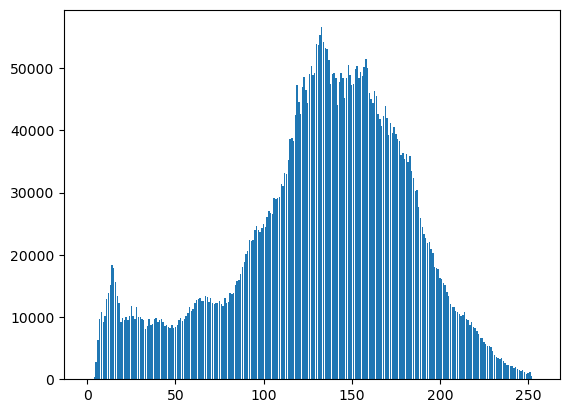

In [47]:
histogrammeImageChiffree1 = calculHistogramme(imageChiffree1)
afficherHistogramme(histogrammeImageChiffree1)

entropieImageChiffree1 = entropieImage(histogrammeImageChiffree1)
print("L'entropie de l'image est de : ", entropieImageChiffree1, "bits par pixel (bpp).")

d) Ecrire une fonction pour "démélanger" les pixels de l'image.

In [72]:
def demelangeImage(imageChiffree, k):
    # passage de la 2D à la 1D
    listePixelsChiffres = image2Dto1D(imageChiffree)

    # calcul du nombre de pixels 
    n = len(listePixelsChiffres)

    # generation de la liste d'indices melangés
    indicesMelanges = melangeIndices(n, k)

    # initialisation de l'image déchiffrée en 1D
    listePixelsDechiffres = [0] * n

    # melange des pixels de l'image originale en utilisant la liste des indices melanges
    for i in range(n):
        nouvelIndice = indicesMelanges[i]
        listePixelsDechiffres[nouvelIndice] = listePixelsChiffres[i]

    # passage de la 1D à la 2D
    imageDechiffree = image1Dto2D(listePixelsDechiffres, imageChiffree.size)

    return imageDechiffree
    

k = 3 # la valeur de la clé peut être modifiée
imageDechiffree1 = demelangeImage(imageChiffree1, k)
afficherImage(imageDechiffree1)

e) Vérifier que l'image originale est bien reconstruite sans perte à l'aide du PSNR.

In [73]:
psnr1 = psnr(image, imageDechiffree1)
print("Le PSNR entre les deux images est de", psnr1, "dB.")

Le PSNR entre les deux images est de inf dB.


### 3 - Chiffrement par substitution

a) Ecrire une fonction qui prend en entrée un nombre $n$ et une clé $k$ et génère une séquence pseudo-aléatoire de pixels (valeurs entre $0$ et $255$) en utilisant la clé comme graine d'initialisation.

In [50]:
def generationPseudoAleatoire(n, k):
    random.seed(k)
    seq = [] 
    for i in range(n):
        seq.append(random.randint(0, 255))
    return seq

n = 100  # le nombre de valeurs générées peut être modifié
k = 10  # la valeur de la clé peut être modifiée
octetsAleatoires = generationPseudoAleatoire(n, k)
print(octetsAleatoires)

[16, 219, 247, 7, 105, 236, 251, 142, 82, 17, 250, 167, 38, 127, 184, 22, 215, 71, 181, 195, 215, 145, 134, 233, 89, 155, 185, 68, 233, 122, 225, 192, 22, 2, 120, 68, 99, 155, 187, 122, 160, 230, 223, 240, 33, 166, 80, 114, 211, 122, 18, 16, 254, 154, 36, 41, 76, 196, 191, 76, 57, 49, 226, 85, 97, 178, 221, 212, 228, 125, 140, 73, 91, 61, 136, 233, 154, 84, 89, 90, 245, 177, 167, 222, 114, 2, 22, 169, 163, 124, 40, 134, 229, 207, 81, 199, 253, 123, 139, 247]


b) En utilisant la fonction précédente, écrire une méthode de chiffrement basée sur l'utilisation du ou-exclusif.

In [51]:
def substitutionImage(image, k):
    # passage de la 2D à la 1D
    listePixels = image2Dto1D(image)

    # calcul du nombre de pixels 
    n = len(listePixels)

    # generation de la liste d'octets pseudo-aléatoires
    octetsAleatoires = generationPseudoAleatoire(n, k)

    # initialisation de l'image chiffrée en 1D
    listePixelsChiffres = [0] * n

    # substitution des pixels de l'image originale en utilisant l'opérateur ou-exclusif (XOR)
    for i in range(n):
        listePixelsChiffres[i] = listePixels[i] ^ octetsAleatoires[i]

    # passage de la 1D à la 2D
    imageChiffree = image1Dto2D(listePixelsChiffres, image.size)

    return imageChiffree

k = 3
imageChiffree2 = substitutionImage(image, k)
afficherImage(imageChiffree2)

c) Afficher l'histogramme et calculer l'entropie de l'image ainsi chiffrée. Que constatez-vous ?

L'entropie de l'image est de :  7.999968165098478 bits par pixel (bpp).


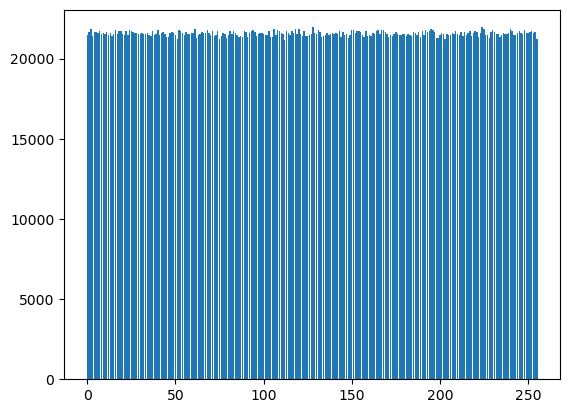

In [52]:
histogrammeImageChiffree2 = calculHistogramme(imageChiffree2)
afficherHistogramme(histogrammeImageChiffree2)

entropieImageChiffree2 = entropieImage(histogrammeImageChiffree2)
print("L'entropie de l'image est de : ", entropieImageChiffree2, "bits par pixel (bpp).")

d) L'opération ou-exclusif étant symétrique, vérifier que l'image originale est reconstruite en réappliquant la fonction de chiffrement. 

In [54]:
k = 3
imageDechiffree2 = substitutionImage(imageChiffree2, k)
afficherImage(imageDechiffree2)

psnr2 = psnr(image, imageDechiffree2)
print("Le PSNR entre les deux images est de", psnr2, "dB.")

Le PSNR entre les deux images est de inf dB.


### 4 - Chiffrement sélectif par plan binaire

Utiliser la fonction ci-dessous en faisant varier l'emplacement du plan binaire chiffré.

In [55]:
def substitionPlanBinaire(image, indicePlan, k):
    # passage de la 2D à la 1D
    listePixels = image2Dto1D(image)

    # calcul du nombre de pixels 
    n = len(listePixels)

    # initialisation du générateur pseudo-aléatoire
    random.seed(k)

    # initialisation de l'image chiffrée en 1D
    listePixelsChiffres = [0] * n

    for i in range(n):
        # génération d'un bit (0 ou 1) et décalage à gauche
        bitAleatoire = random.randint(0, 1) << (7 - indicePlan)
        # opération ou-exclusif
        listePixelsChiffres[i] = listePixels[i] ^ bitAleatoire

    # passage de la 1D à la 2D
    imageChiffreeSelectivement = image1Dto2D(listePixelsChiffres, image.size)

    return imageChiffreeSelectivement
    

Chiffrement du plan binaire le plus significatif (MSB)

In [60]:
k = 3
imageChiffreeMSB = substitionPlanBinaire(image, 0, k)
afficherImage(imageChiffreeMSB)

psnrMSB = psnr(image, imageChiffreeMSB)
print("Le PSNR entre les deux images est de", psnrMSB, "dB.")

Le PSNR entre les deux images est de 8.996547092602091 dB.


Chiffrement du plan binaire le moins significatif (LSB)

In [61]:
k = 3
imageChiffreeLSB = substitionPlanBinaire(image, 7, k)
afficherImage(imageChiffreeLSB)

psnrLSB = psnr(image, imageChiffreeLSB)
print("Le PSNR entre les deux images est de", psnrLSB, "dB.")

Le PSNR entre les deux images est de 51.140746485559454 dB.
